In [1]:
import numpy as np
import pandas as pd
import json
import requests
import ast

import matplotlib.pyplot as plt
from matplotlib import style
style.use('seaborn')
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

from imdb import IMDb
ia = IMDb()

In [2]:
from eric_keys import eric_omdb_key, eric_tmdb_key, eric_tmdb_token
from eric_analysis import language_count, top_five_lang

In [3]:
# Read Clean csv
df = pd.read_csv('clean_df.csv', index_col='id').sort_index()
df['genre_names']=df['genre_names'].apply(lambda x: ast.literal_eval(x))
df['countries']=df['countries'].apply(lambda x: ast.literal_eval(x))
df

,imdb_id,budget,revenue,genre_names,original_title,runtime,status,countries,title,original_language,...,Family,Crime,War,Science Fiction,Horror,Music,Western,TV Movie,profit,profit_margin
id,,,,,,,,,,,,,,,,,,,,,
55,tt0245712,2000000.0,20908467.0,"[Drama, Thriller]",Amores perros,154.0,Released,[Mexico],Amores Perros,Spanish,...,0,0,0,0,0,0,0,0,18908467.0,90.4
64,tt0287467,NaN,64790996.0,"[Drama, Romance]",Hable con ella,112.0,Released,[Spain],Talk to Her,Spanish,...,0,0,0,0,0,0,0,0,NaN,NaN
79,tt0299977,31000000.0,177395557.0,"[Drama, Adventure, Action, History]",英雄,99.0,Released,[China],Hero,Chinese,...,0,0,0,0,0,0,0,0,146395557.0,82.5
99,tt0185125,8272296.0,67952969.0,"[Comedy, Drama]",Todo sobre mi madre,101.0,Released,"[Spain, France]",All About My Mother,Spanish,...,0,0,0,0,0,0,0,0,59680673.0,87.8
104,tt0130827,1530000.0,7267585.0,"[Action, Drama, Thriller]",Lola rennt,81.0,Released,[Germany],Run Lola Run,German,...,0,0,0,0,0,0,0,0,5737585.0,78.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637920,tt10431500,NaN,17321629.0,"[Drama, Comedy, Family]",7. Koğuştaki Mucize,132.0,Released,[Turkey],Miracle in Cell No. 7,Turkish,...,1,0,0,0,0,0,0,0,NaN,NaN
652483,tt10731748,NaN,NaN,"[Comedy, Romance]",Modo Avião,96.0,Released,[Brazil],Airplane Mode,Portuguese,...,0,0,0,0,0,0,0,0,NaN,NaN
658760,tt9806322,NaN,NaN,"[Romance, Comedy]",Isi & Ossi,113.0,Released,[Germany],Isi & Ossi,German,...,0,0,0,0,0,0,0,0,NaN,NaN


In [6]:
df[df['original_language']=='French']['budget'].sort_values()

id
65229     1000000.0
86331     1344000.0
366564    2023920.0
60670     2365000.0
406       2600000.0
            ...    
583268          NaN
586863          NaN
586940          NaN
587301          NaN
595975          NaN
Name: budget, Length: 360, dtype: float64

In [20]:
df[df['original_language']=='French']['budget'].sort_values()

id
65229     1000000.0
86331     1344000.0
366564    2023920.0
60670     2365000.0
406       2600000.0
            ...    
583268          NaN
586863          NaN
586940          NaN
587301          NaN
595975          NaN
Name: budget, Length: 360, dtype: float64

In [14]:
df['profit_margin'].count()

387

In [12]:
df['profit'].sort_values(ascending=False)

id
535167    651760773.0
77338     413588510.0
129       328742810.0
360814    293323636.0
496243    242844199.0
             ...     
637920            NaN
652483            NaN
658760            NaN
668195            NaN
674944            NaN
Name: profit, Length: 1013, dtype: float64

In [7]:
# Drop profit outliers
df.drop([76758,15362], inplace=True)

In [10]:
df.to_csv('clean_df.csv')

In [27]:
top_five_lang['French'].keys()

dict_keys(['movie_count', 'mean_vote_count', 'median_vote_count', '90s_mean_vote', '00s_mean_vote', '10s_mean_vote', '90s_median_vote', '00s_median_vote', '10s_median_vote', '90s_mean_popularity', '00s_mean_popularity', '10s_mean_popularity', '90s_median_popularity', '00s_median_popularity', '10s_median_popularity', '90s_mean_budget', '00s_mean_budget', '10s_mean_budget', '90s_median_budget', '00s_median_budget', '10s_median_budget', '90s_mean_revenue', '00s_mean_revenue', '10s_mean_revenue', '90s_median_revenue', '00s_median_revenue', '10s_median_revenue', '90s_mean_profit', '00s_mean_profit', '10s_mean_profit', '90s_median_profit', '00s_median_profit', '10s_median_profit', '90s_mean_profit_margin', '00s_mean_profit_margin', '10s_mean_profit_margin', '90s_median_profit_margin', '00s_median_profit_margin', '10s_median_profit_margin'])

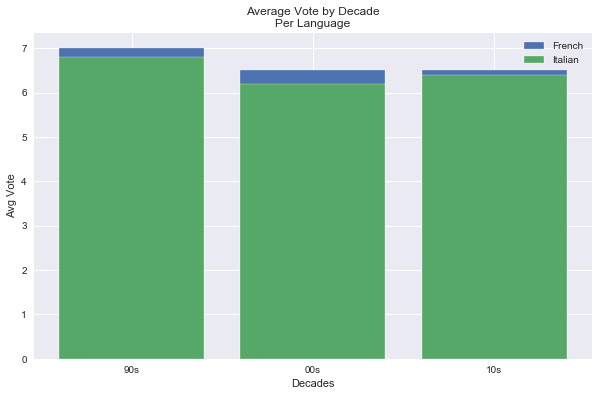

In [18]:
top_five_list = list(top_five_lang.keys())
decades = ['90s', '00s', '10s']
test = [top_five_lang['French'][f'{decade}_mean_vote'] for decade in decades]
test2 = [top_five_lang['Italian'][f'{decade}_mean_vote'] for decade in decades]
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(decades, test, label='French')
ax.bar(decades, test2, label='Italian')
ax.legend()
ax.set_title('Average Vote by Decade\nPer Language')
ax.set_xlabel('Decades')
ax.set_ylabel('Avg Vote')
plt.show()

In [ ]:
top_five_list = list(top_five_lang.keys())
decades = ['90s', '00s', '10s']
test1 = ax.bar()

In [ ]:
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects2 = ax.bar(x + width/2, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

In [ ]:
ages = data['Age']
dev_salaries = data['All_Devs']
py_salaries = data['Python']
js_salaries = data['JavaScript']

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)

ax1.plot(ages, dev_salaries, color='#444444',
         linestyle='--', label='All Devs')

ax2.plot(ages, py_salaries, label='Python')
ax2.plot(ages, js_salaries, label='JavaScript')

ax1.legend()
ax1.set_title('Median Salary (USD) by Age')
# X Label unnecessary on ax1
# ax1.set_xlabel('Ages')
ax1.set_label('Median Salary (USD)')

ax2.legend()
# Title unnecessary on ax2
# ax2.set_title('Median Salary (USD) by Age')
ax2.set_xlabel('Ages')
ax2.set_label('Median Salary (USD)')

plt.tight_layout()

plt.show()